<bound method NDFrame.head of     data_index
0            0
1            1
2            2
3            3
4            4
..         ...
83          83
84          84
85          85
86          86
87          87

[88 rows x 1 columns]>
       0      1      2      3     4  ...    38    39    40    41  data_index
0 $37.25 $45.00 $40.62 $40.50 $1.48  ... $0.43 $0.58 $0.00 $1.30           0
0 $38.00 $45.67 $42.81 $42.50 $1.43  ... $0.43 $0.60 $0.00 $1.30           0
0 $35.00 $47.40 $43.95 $44.33 $1.56  ... $0.43 $0.51 $0.00 $0.94           0
0 $33.00 $47.75 $42.18 $43.50 $3.67  ... $0.50 $0.52 $0.00 $1.00           0
0 $33.00 $45.75 $41.68 $41.75 $2.24  ... $0.43 $0.39 $0.00 $0.50           0

[5 rows x 43 columns]
New Data Set with 88 rows is currently:  (88, 43) Data are:         0      1      2      3     4  ...    38    39    40    41  data_index
0  $37.25 $45.00 $40.62 $40.50 $1.48  ... $0.43 $0.58 $0.00 $1.30           0
0  $38.00 $45.67 $42.81 $42.50 $1.43  ... $0.43 $0.60 $0.00 $1.30

count   $88.00
mean    $29.04
std      $9.57
min      $0.00
25%     $21.88
50%     $28.62
75%     $36.27
max     $48.00
Name: 0, dtype: float64

count   $44.00
mean    $29.57
std      $8.66
min     $12.75
25%     $23.00
50%     $28.25
75%     $36.44
max     $48.00
Name: 0, dtype: float64

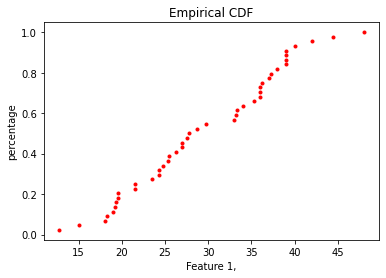

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


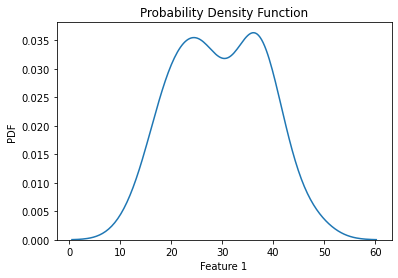

Empirical std:  8.656364640214457
Bootstrap replicates std:  8.410375114272762


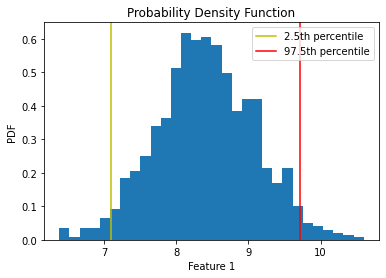

In [ ]:
from __future__ import print_function

# Import pandas 
import pandas as pd 
pd.__version__

import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

pd.options.display.float_format = '${:,.2f}'.format
np.set_printoptions(formatter={'float': lambda x: "{0:0.2f}".format(x)})

def addDataRowsComb(dataMiniSet):
  combData=np.array([0]) 
  #print(type(combData))
  for i in range(1,7,1):
    dataDummy=dataMiniSet[:,i]
    #print(type(dataDummy))
    #print(dataDummy.shape)
    #print(dataDummy)
    newCombData=np.array([[dataDummy.min(),dataDummy.max(),dataDummy.mean(),np.median(dataDummy),dataDummy.std(),np.quantile(dataDummy, 0.25),np.quantile(dataDummy,0.75)]])
    #print(type(newCombData))
    #print("newCombData",newCombData.shape)
    #print(newCombData)
    #print("CombData:",combData.shape)
    #print("CombData:",combData)
    combData=np.append(combData,newCombData)
  
  combData=np.delete(combData,0)
  #print("CombData:",combData.shape)
  #print(combData)
  return pd.DataFrame(combData)

# Create a function to get x, y for of ecdf
def get_ecdf(data):
    """Returns x,y for ecdf"""
    # Get lenght of the data into n
    n = len(data)
    # We need to sort the data
    x = np.sort(data)
    # the function will show us cumulative percentages of corresponding data points
    y = np.arange(1,n+1)/n
    return x,y

# Create a function to plot ecdf
def plot_ecdf(data,labelx,labely,title,color):
    """Plot ecdf"""
    # Call get_ecdf function and assign the returning values
    x, y = get_ecdf(data)
    plt.plot(x,y,marker='.',linestyle='none',c=color)
    plt.xlabel(labelx)
    plt.ylabel(labely)
    plt.title(title)
    

def draw_bs_replicates(data,func,size):
    """creates a bootstrap sample, computes replicates and returns replicates array"""
    # Create an empty array to store replicates
    bs_replicates = np.empty(size) 
    # Create bootstrap replicates as much as size
    for i in range(size):
        # Create a bootstrap sample
        bs_sample = np.random.choice(data,size=len(data))
        # Get bootstrap replicate and append to bs_replicates
        bs_replicates[i] = func(bs_sample) 
    return bs_replicates

newDataSet=pd.DataFrame()
iData=[7,6,15,15,15,15,15]
counter=0
for kClass in ['bending1/','bending2/','cycling/','lying/','sitting/','standing/','walking/']:
#for kClass in ['bending1/']:
  for jDataset in range(1,iData[counter]+1,1):
    url='https://raw.githubusercontent.com/allen-ml/ML-Project-3_Time_Series/main/'+kClass+'dataset'+str(jDataset)+'.csv'
    #print(str(url))
    #if not (kClass == 'cycling/' and (jDataset == 9 or jDataset == 14)):
    #  continue
    dataInstance = pd.read_csv(url,skiprows=[0,1,2,3])
    #print(dataInstance)
    newRow=addDataRowsComb(dataInstance.to_numpy())
    #print(newRow.transpose())
    newDataSet=pd.concat([newDataSet,newRow.transpose()])
  counter+=1

a = map(str, range(0, 41+1))
newDataSet.columns=list(map(str,a))
# Add a column to the data indicating the index number based  on the maximum number of rows. 
df_dummy=pd.DataFrame(range(newDataSet.shape[0]),columns=["data_index"])
print(df_dummy.head)
newDataSet["data_index"]=df_dummy
print(newDataSet.head())

print("New Data Set with 88 rows is currently: ",np.shape(newDataSet),"Data are:",newDataSet,"\n\n\n\n")
#for iCol in range(0,42,1):
newDataSetSTD=newDataSet.std(axis = 0, skipna = True)
print(newDataSetSTD.shape,newDataSetSTD)
print("Original STD")
display(newDataSet['0'].describe())



# Extract 88/2=44 random samples
col0 = newDataSet['0'].sample(44).reset_index(drop=True)

# Display Summary Statistics of heights in cm
display(col0.describe())

# Plotting Empirical CDF
plot_ecdf(col0,"Feature 1,","percentage","Empirical CDF","r")
plt.show()

# Plotting PDF
sns.distplot(col0,hist=False)
plt.xlabel("Feature 1")
plt.ylabel("PDF")
plt.title("Probability Density Function")
plt.show()

# Draw 100 bootstrap replicates
bs_replicates = draw_bs_replicates(col0,np.std,1000)

# Print empirical mean
print("Empirical std: " , str(col0.std()))

# Print the mean of bootstrap replicates
print("Bootstrap replicates std: " , str(np.mean(bs_replicates)))

# Plot the PDF for bootstrap replicates as histogram
plt.hist(bs_replicates,bins=30,density=True)

# Showing the related percentiles
plt.axvline(x=np.percentile(bs_replicates,[2.5]), ymin=0, ymax=1,label='2.5th percentile',c='y')
plt.axvline(x=np.percentile(bs_replicates,[97.5]), ymin=0, ymax=1,label='97.5th percentile',c='r')

plt.xlabel("Feature 1")
plt.ylabel("PDF")
plt.title("Probability Density Function")
plt.legend()
plt.show()

i.	Assume that you want to use the training set to classify bending from other activities, i.e. you  have  a  binary  classification  problem.  Depict  scatter  plots of the features (Mean, 25% Percentile, 75% percentile) extracted from time series 1, 2, and 6 of each instance, and use color to distinguish bending vs.  other activities.  



['2', '5', '6', '9', '12', '13', '37', '40', '41']
        2      5      6     9    12    13    37    40    41
0  $40.62 $39.25 $42.00 $0.36 $0.00 $0.50 $0.57 $0.00 $1.30
0  $42.81 $42.00 $43.67 $0.37 $0.00 $0.50 $0.57 $0.00 $1.30
0  $43.95 $43.00 $45.00 $0.43 $0.00 $0.50 $0.49 $0.00 $0.94
0  $42.18 $39.15 $45.00 $0.70 $0.00 $1.12 $0.61 $0.00 $1.00
0  $41.68 $41.33 $42.75 $0.54 $0.43 $0.71 $0.38 $0.00 $0.50
..    ...    ...    ...   ...   ...   ...   ...   ...   ...
0  $33.59 $30.25 $37.00 $4.58 $2.87 $6.10 $3.26 $2.05 $4.32
0  $34.32 $31.00 $38.00 $4.46 $2.49 $5.97 $3.43 $2.16 $4.56
0  $34.55 $31.25 $37.81 $4.37 $2.49 $5.80 $3.34 $2.16 $4.33
0  $34.87 $31.75 $38.25 $4.38 $2.50 $5.93 $3.42 $2.17 $4.50
0  $34.47 $31.25 $38.00 $4.36 $2.49 $5.90 $3.34 $2.12 $4.38

[88 rows x 9 columns]
(12, 9)        2      5      6     9    12    13    37    40    41
0 $40.62 $39.25 $42.00 $0.36 $0.00 $0.50 $0.57 $0.00 $1.30
0 $42.81 $42.00 $43.67 $0.37 $0.00 $0.50 $0.57 $0.00 $1.30
0 $43.95 $43.00 $45.0

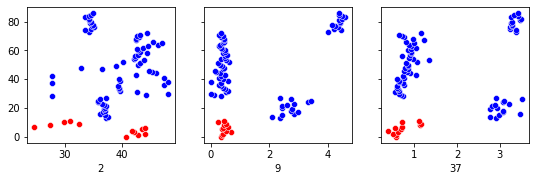

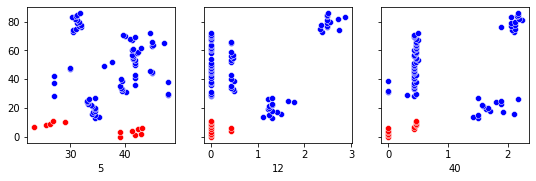

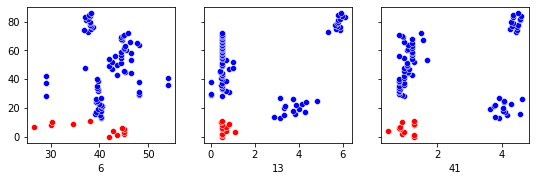

In [ ]:
targetColumns=[str(2),str(5),str(6),str(2+7),str(5+7),str(6+7),str(2+5*7),str(5+5*7),str(6+5*7)]
#targetColumns=[str(1),str(2),str(3),str(1+7),str(2+7),str(3+7),str(1+5*7),str(2+5*7),str(3+5*7)]
#targetColumnsInt=[2,5,6,2+7,5+7,6+7,2+5*7,5+5*7,6+5*7]
print(targetColumns)
bendingClassificationData=newDataSet[targetColumns]
print(bendingClassificationData)
bendingData=bendingClassificationData.iloc[0:12,:]
print(bendingData.shape,bendingData)
otherData=bendingClassificationData.iloc[13:87,:]
print(otherData.shape,otherData)
from google.colab import files
for i in [2,5,6]:
#for i in [1,2,3]:
  f, axes = plt.subplots(1,3, sharey=True, figsize=(9, 2.5))
  sns.scatterplot(x=str(i), y=range(0,12,1), data=bendingData,color='red',ax=axes[0])
  sns.scatterplot(x=str(i), y=range(13,87,1), data=otherData,color='blue',ax=axes[0])
  sns.scatterplot(x=str(i+7), y=range(0,12,1), data=bendingData,color='red',ax=axes[1])
  sns.scatterplot(x=str(i+7), y=range(13,87,1), data=otherData,color='blue',ax=axes[1])
  sns.scatterplot(x=str(i+5*7), y=range(0,12,1), data=bendingData,color='red',ax=axes[2])
  sns.scatterplot(x=str(i+5*7), y=range(13,87,1), data=otherData,color='blue',ax=axes[2])
  #plt.savefig("P3_min_max_ave.pdf")
  #files.download("P3_min_max_ave.pdf")
  plt.show()

